# Coarse supervision

This notebooks explains step-by-step how the custom dataset is build.

In [1]:
import sys
sys.path.append('c:\\Users\\robin\\Documents\\HyperBrain')
sys.path.append('c:\\Users\\robin\\Documents\\HyperBrain\\source')

In [19]:
import os
from source.data_processing.image_reading import read_image
from source.data_processing.transformations import sample_random_affine_matrix
from kornia.geometry.transform import warp_affine
from source.data_processing.transformations import *
from source.data_processing.keypoints import generate_image_grid_coordinates
from source.visualization.image_visualization import *
from torchvision import transforms

#### Read 2 consecutive images

In [3]:
images_directory = "../../data/cyto_downscaled_3344_3904/"
image_names = os.listdir(images_directory)
image_1, image_2 = read_image(
    os.path.join(images_directory, image_names[0])
), read_image(os.path.join(images_directory, image_names[1]))
image_1 = transforms.ToTensor()(image_1)
image_2 = transforms.ToTensor()(image_2)

In [4]:
image_size = image_1.shape[-2:]
image_size

torch.Size([3344, 3904])

Note that these are not the same images!

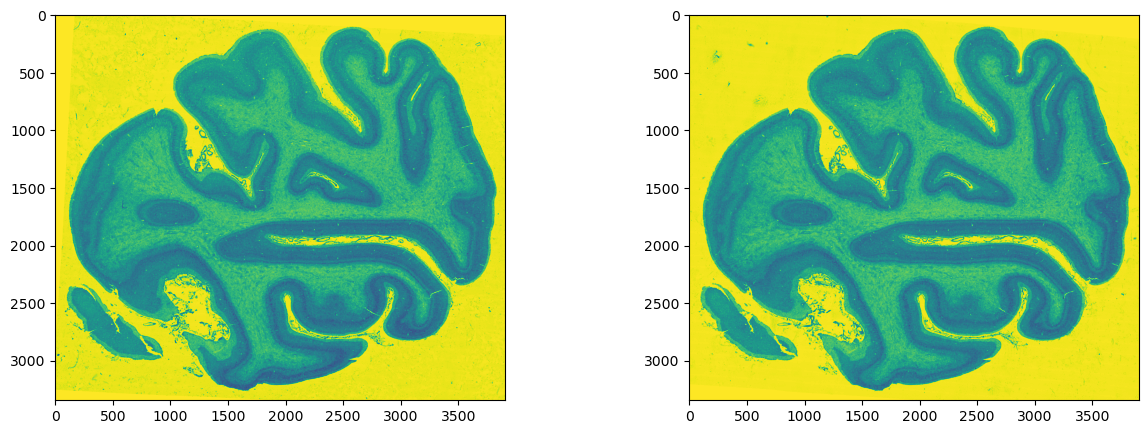

In [5]:
plot_images_in_row([image_1[0], image_2[0]])

#### Transform image 2

Note that this is the same image but one is transformed

In [8]:
transformation_matrix = sample_random_affine_matrix(range_limit=0.2)
image_2_transformed = warp_affine(
    src=image_2.unsqueeze(0), M=transformation_matrix, dsize=image_size, mode="nearest"
)[0]

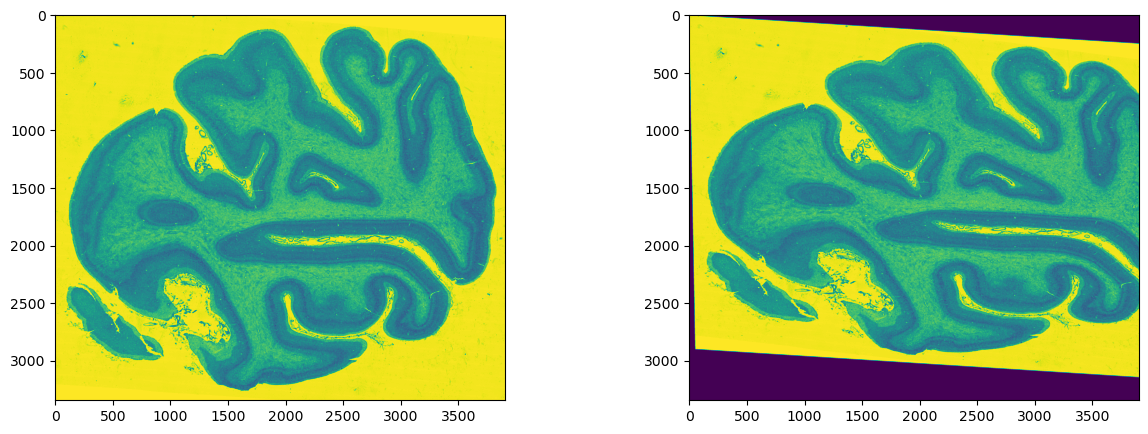

In [9]:
plot_images_in_row([image_2[0], image_2_transformed[0]])

#### Create grid coordinates and a corresponding mapping between image_1 and image_2_transformed

Grid coordinate holds the pixel coordinates, ie grid_coordinates[i,j] = i,j

In [13]:
grid_coordinates = generate_image_grid_coordinates(image_size)
grid_coordinates.shape

torch.Size([3344, 3904, 2])

image_coordinate_mapping holds the mapping from image_1 to image_2_transformed. Can be interpreted as follows: image_coordinate_mapping[i,j] give the coordinate in image_2_transformed of pixel (i,j) in image_1.

In [16]:
image_coordinate_mapping = transform_grid_coordinates(
    grid_coordinates, transformation_matrix[0]
)
image_coordinate_mapping.shape

torch.Size([3344, 3904, 2])

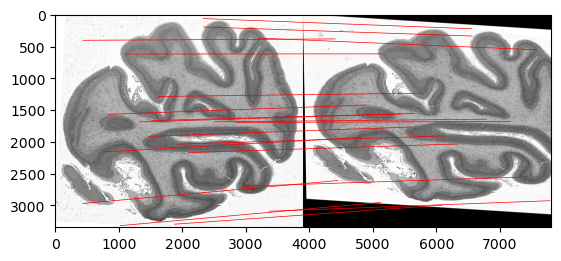

In [21]:
plot_images_with_matches_via_mapping(
    image_1,
    image_2_transformed,
    image_coordinate_mapping,
    number_of_matches=20,
    sample_keypoints_randomly=True,
)